**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques #2- Algorithme du gradient](static/01-A2-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique propose la mise en oeuvre sous forme de code Python de l'**algorithme du gradient en régression linéaire simple**. Le jeu de données utilisé sera une version simplifiée du jeu de données *Advertising*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Outils divers
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Lecture du jeu de données advertising

**Exercice 1**: à l'aide de la bibiothèques *pandas*, lire le fichier `advertising-univariate.csv`

In [4]:
# Compléter le code ci-dessous ~ 1 ligne
df = pd.read_csv('../../data/advertising-univariate.csv', usecols=['TV','sales'])

### 2 - Définition du modèle et de la fonction de coût

**Exercice 2**: compléter la fonction ci-dessous représentant le modèle de régression linéaire simple (hypothèse)

Pour rappel, le modèle de régression linéaire simple est

$h_{\theta}(x)=\theta_{0} + \theta_{1}x$

In [5]:
def hypothesis(x, theta_0, theta_1):
    # Compléter le code ~ 1 ligne
    h = theta_0 + theta_1 * x
    return h

**Exercice 3**: compléter la fonction ci-dessous permettant le calcul du coût (fonction de coût)

Pour rappel, la fonction de coût en régression linéaire simple s'exprime sous la forme

$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)}))^{2}$

In [6]:
def cost_function(x,y, theta_0, theta_1):
    assert len(x) == len(y)
    
    
    return cost

### 3 - Préparation de la structure de données

In [7]:
x = df['TV'].values
y = df['sales'].values
x = x/100 # Cette mise à l'échelle permet un meilleur affichage des résultats

### 4 - Algorithme du gradient

**Exercice 4**: Compléter l'algorithme du gradient. Choisir les valeurs initiales des paramètres $\theta_0$ et $\theta_1$, la valeurs du **pas** ($\alpha$) et le **nombre d'itérations**. Un test de convergence ne sera pas utilisé ici.

$
\text{Répéter pendant n_iterations}
\{\\
\theta_{0}:= \theta_{0} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\\
\theta_{1}:= \theta_{1} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\times x^{(i)}
\\
\}
$

In [8]:
theta_0 = 0
theta_1 = 0
alpha = 0.001
n_iterations = 400000

m = len(x)

history = defaultdict(list)

for i in tqdm(range(0, n_iterations)):
    
    # ~ 4-6 lignes de code
    d_theta_0 = (1/m) * np.sum(hypothesis(x, theta_0, theta_1) - y)
    d_theta_1 = (1/m) * np.sum((hypothesis(x, theta_0, theta_1) - y) * x)
    
    temp0 = theta_0 - (alpha * d_theta_0)
    temp1 = theta_1 - (alpha * d_theta_1)
    
    theta_0 = temp0
    theta_1 = temp1
    
    # Sauvegarde des valeurs intermédiaires de theta_0, theta_1 et du coût
    if i%5000 == 0:
        cost = cost_function(x, y, theta_0, theta_1)
        history['theta_0'].append(theta_0)
        history['theta_1'].append(theta_1)
        history['cost'].append(cost)

print(f'Theta_0 = {theta_0}')
print(f'Theta_1 = {theta_1}')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400000/400000 [00:07<00:00, 52293.66it/s]

Theta_0 = 7.0325935491250515
Theta_1 = 4.75366404330347


### 5 - Affichage du modèle

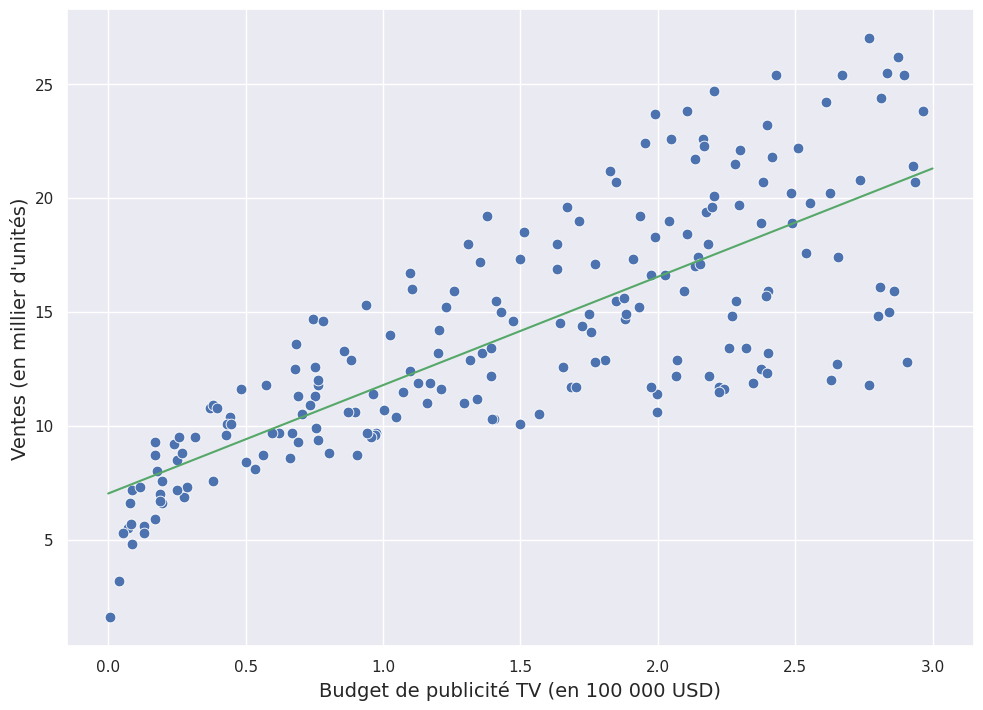

In [9]:
ax = sns.scatterplot(x=x, y=y, s=60)
ax.set_xlabel("Budget de publicité TV (en 100 000 USD)", fontsize=14)
ax.set_ylabel("Ventes (en millier d'unités)", fontsize=14)

X = np.linspace(0,3,100)
Y = hypothesis(X,theta_0,theta_1)
plt.plot(X,Y, color="g")

### 6 - Affichage de l'évolution de $\theta_{0}$, $\theta_{1}$ et la fonction de coût lors de l'optimisation

Text(0.5, 0, 'Itérations')

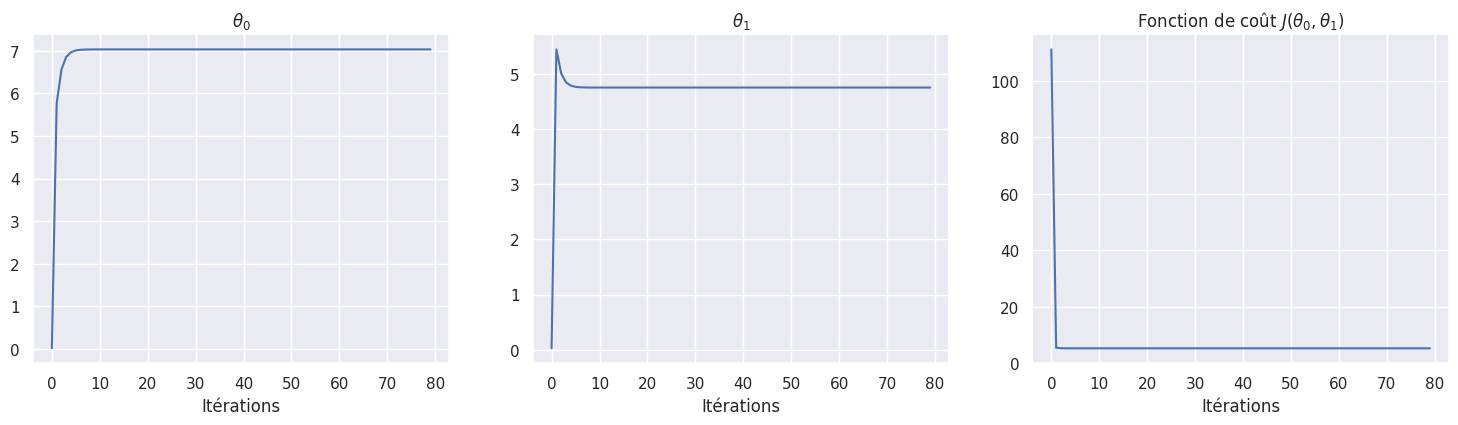

In [10]:
sns.set(rc={'figure.figsize':(18.27,4.27)})
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(history['theta_0'])
ax1.set_title(r'$\theta_{0}$')
ax1.set_xlabel('Itérations')
ax2.plot(history['theta_1'])
ax2.set_title(r'$\theta_{1}$')
ax2.set_xlabel('Itérations')
ax3.plot(history['cost'])
ax3.set_title(r'Fonction de coût $J(\theta_{0},\theta_{1})$')
ax3.set_xlabel('Itérations')

### 7 - Affichage de l'évolution de $\theta_{0}$ et $\theta_{1}$ sur les courbes de niveau (fonction de coût)

Remarque: afin de visualiser les évolutions des paramètres, vous devrez éventuellement diminuer la valuer du pas.

Text(0, 0.5, '$\\theta_{0}$')

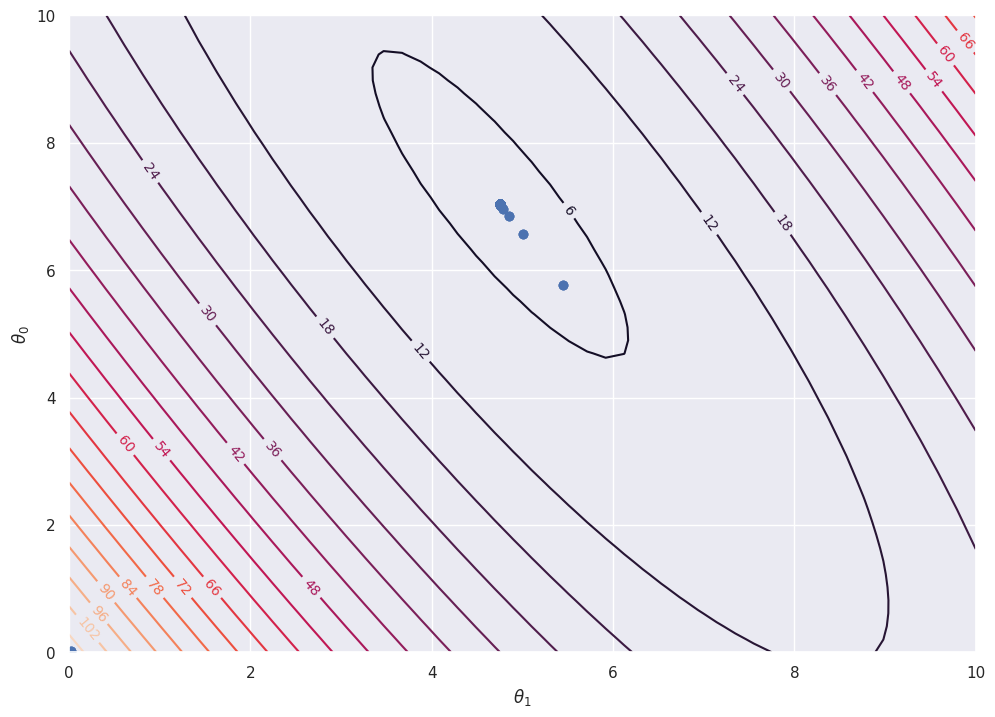

In [11]:
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})
theta_0s = np.linspace(0,10,50)
theta_1s = np.linspace(0,10,50)
mesh = np.zeros((50,50))
for i, theta0 in enumerate(theta_0s):
    for j, theta1 in enumerate(theta_1s):
        mesh[i,j] = cost_function(x, y, theta0, theta1)
        
fig, ax = plt.subplots()
XX, YY = np.meshgrid(theta_0s,theta_1s)
CS = ax.contour(XX, YY, mesh, levels=20)

for h in history:
    ax.plot(history['theta_1'], history['theta_0'], 'bo')

ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'$\theta_{1}$')
ax.set_ylabel(r'$\theta_{0}$')

### Fin du TP